In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline
# set random seed in your environment setup for consistency:
seed = 123

In [18]:
from acquire_mall import *
from prepare_mall import *

In [19]:
df_mall = prep_mall_data(get_mall_data())

In [20]:
df_mall.head()

,customer_id,gender,age,annual_income,spending_score,gender_e
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [21]:
# assess what data types you are actually working with:
# truly continuous?
# discrete/categorical?
# numeric that represent discrete/cats?
#    ^>options: not plot, use as continuous variable, bin
#    

In [22]:
import pandas as pd
dfz = df.from_csv('zillow.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [23]:
# dfz = dfz[['bathroomcnt', 'bedroomcnt', 'logerror']]

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

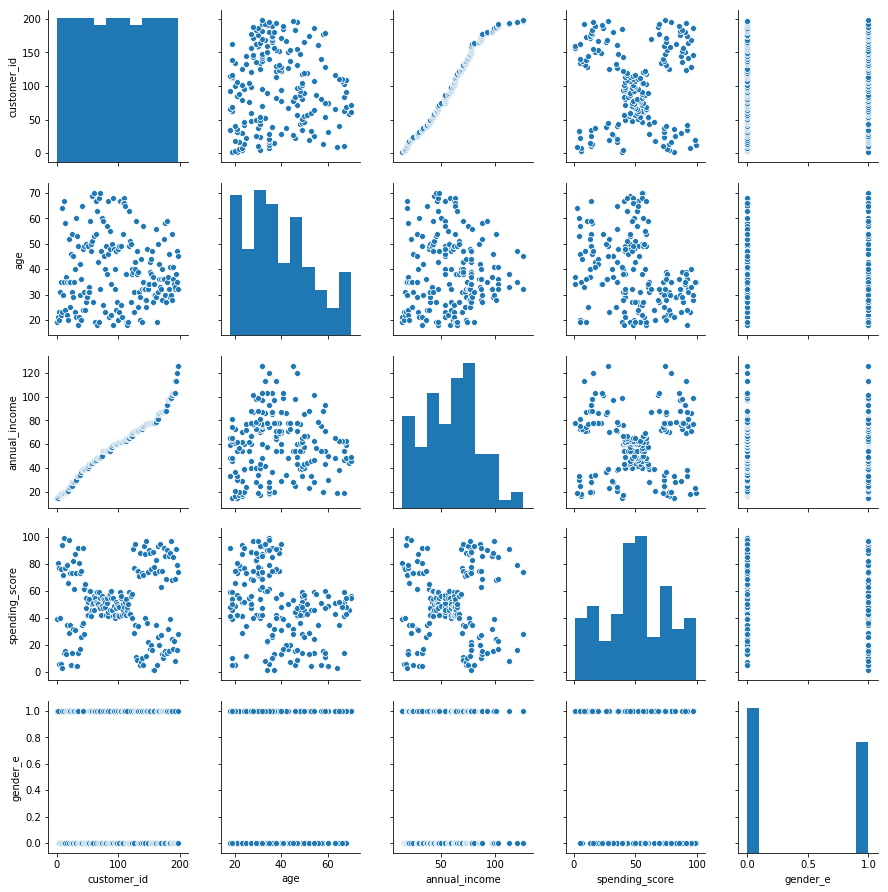

In [36]:
sns.pairplot(df_mall)

In [30]:
stats.ttest_ind(df_mall[df_mall.age < 30].spending_score.dropna(), df_mall[df_mall.age > 50].spending_score.dropna())

Ttest_indResult(statistic=4.6562969736005675, pvalue=1.0678596954730475e-05)

In [41]:
stats.ttest_ind(dfz[dfz.regionidcounty == 3101].logerror.dropna(), dfz[dfz != 3101].logerror.dropna())
stats.ttest_ind(dfz[dfz.bedroomcnt > 4].logerror.dropna(), dfz[dfz.bedroomcnt == 3].logerror.dropna())

Ttest_indResult(statistic=9.98180964008204, pvalue=1.890615130676115e-23)

In [31]:
dfz['logerror_bin'] = pd.qcut(dfz.logerror, 4, labels=False)

KeyboardInterrupt: 

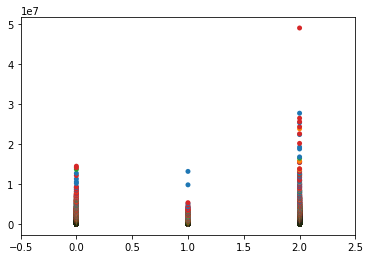

In [32]:
sns.swarmplot(x='regionidcounty', y='taxvaluedollarcnt', hue='logerror_bin', data=dfz)

In [ ]:
df_mall['age_bin'] = pd.qcut(df_mall.age, 4, labels=False)
sns.swarmplot(x='age_bin', y='spending_score', hue='gender', data=df_mall)

In [33]:
df_mall

,customer_id,gender,age,annual_income,spending_score,gender_e
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,1
9,10,Female,30,19,72,0


In [34]:
num_cols = df_mall.select_dtypes('number').columns

In [35]:
num_cols

Index(['customer_id', 'age', 'annual_income', 'spending_score', 'gender_e'], dtype='object')